# **EDA** (Exploratory Data Analysis)
## Heart Disease Health Indicators Dataset
### Gian Paolo Robelo 20230117, Jose Pablo Tanchez 20230005


In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Cargar datos
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:

# Verificar valores nulos
df.isnull().sum()


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## **Preguntas**
#### 1. ¿Cuántos días reportan las personas, con y sin enfermedad, de mala salud física y mental?
#### 2. ¿Cual es el promedio de **BMI** (Body Mass Index) de las personas enfermas y no enfermas?
#### 3. ¿Cuál es la proporción de las personas enfermas según su edad y sexo?

## 1. ¿Cuántos días reportan las personas, con y sin enfermedad, de mala salud física y mental?

In [9]:
# Días promedio de mala salud física y mental por grupo
salud_promedios = df.groupby("HeartDiseaseorAttack")[["PhysHlth", "MentHlth"]].mean().round(2)

print("Días promedio de mala salud:")
print(salud_promedios)

# Diferencia en días entre ambos grupos
diferencia_fisica = salud_promedios.loc[1, "PhysHlth"] - salud_promedios.loc[0, "PhysHlth"]
diferencia_mental = salud_promedios.loc[1, "MentHlth"] - salud_promedios.loc[0, "MentHlth"]

print("\nDiferencias en días promedio:")
print("Física:", round(diferencia_fisica, 2))
print("Mental:", round(diferencia_mental, 2))


Días promedio de mala salud:
                      PhysHlth  MentHlth
HeartDiseaseorAttack                    
0.0                       3.73      3.03
1.0                       9.15      4.67

Diferencias en días promedio:
Física: 5.42
Mental: 1.64


####  - Las personas que no sufrían de ninguna enfermedad cardiaca ni tuvieron un ataque, reportaron, de los últimos 30 días, en promedio 4 días de mala salud física y 3 días de mala salud mental.
####  - Las personas que sí sufrían alguna enfermedad cardiaca o tuvieron un ataque, reportaron, en los últimos 30 días, en promedio 9 días de mala salud física y 5 días de mala salud mental.
#### - Las personas que resultaron tener enfermedades cardiacas o un ataque sí mostraron una mayor mala salud mental y física los últimos 30 días que las personas que resultaron sanas.

## 2. ¿Cual es el promedio de **BMI** (Body Mass Index) de las personas enfermas y no enfermas?

In [10]:
# Promedio de BMI por grupo de enfermedad cardíaca
bmi_promedios = df.groupby("HeartDiseaseorAttack")["BMI"].mean()

print("Promedio de BMI:")
print("Sin enfermedad cardíaca:", round(bmi_promedios[0], 2))
print("Con enfermedad cardíaca:", round(bmi_promedios[1], 2))
print("Diferencia:", round(bmi_promedios[1] - bmi_promedios[0], 2))


Promedio de BMI:
Sin enfermedad cardíaca: 28.27
Con enfermedad cardíaca: 29.47
Diferencia: 1.2


#### - Las personas sin enfermedad cardíaca mostraron, en promedio un BMI de 28.27, el cual se puede clasificar como sobrepeso.
#### - Las personas con enfermedad cardíaca mostraron, en promedio un BMI de 29.47, el cual también se puede clasificar como sobrepeso, pero está al límite de obesidad.
##### - **Esto se concluye según la siguiente clasificación del BMI:**
##### - Bajo peso: Menos de 18.5. 
##### - Peso saludable: Entre 18.5 y 24.9. 
##### - Sobrepeso: Entre 25 y 29.9. 
##### - Obesidad: 30 o más. 

## 3. ¿Cuál es la proporción de las personas enfermas según su edad y sexo?

C:\Users\gianp\AppData\Local\Temp\ipykernel_10140\2355569123.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby(["SexLabel", "AgeCategory"])["HeartDiseaseorAttack"].mean().reset_index()


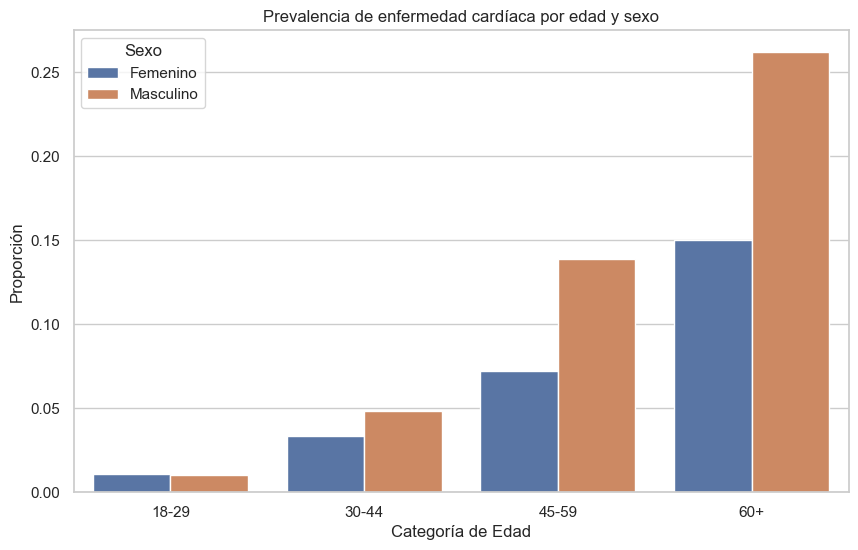

In [11]:

df["AgeCategory"] = pd.cut(df["Age"], bins=[0, 4, 7, 10, 13], labels=["18-29", "30-44", "45-59", "60+"])
df["SexLabel"] = df["Sex"].map({0: "Femenino", 1: "Masculino"})


group = df.groupby(["SexLabel", "AgeCategory"])["HeartDiseaseorAttack"].mean().reset_index()

sns.barplot(data=group, x="AgeCategory", y="HeartDiseaseorAttack", hue="SexLabel")
plt.title("Prevalencia de enfermedad cardíaca por edad y sexo")
plt.ylabel("Proporción")
plt.xlabel("Categoría de Edad")
plt.xticks(rotation=0)
plt.legend(title="Sexo")
plt.show()



#### - Se puede ver que conforme es mayor la persona, la proporción de enfermedades cardíacas aumenta independientemente del sexo. Sin embargo, a lo largo de la mayoría de los rangos de edades, se puede ver como los hombres tienen una mayor proporción sobre las mujeres.